In [2]:
!pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import yfinance as yf
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint
from sklearn.model_selection import train_test_split

In [12]:
companies=pd.DataFrame()
stocks=["AAPL", "MSFT", "GOOGL", "AMZN", "TSLA", "JPM", "WMT", "JNJ", "V", "PG", "KO", "NFLX", "DIS", "NVDA", "VZ", "T", "IBM", "HD","BA","MA"]
for stock in stocks:
    stk=yf.Ticker(stock)
    data=stk.history(start='2017-06-01',end='2020-06-01')
    companies[stock]=data['Close']
companies.head()

,AAPL,MSFT,GOOGL,AMZN,TSLA,JPM,WMT,JNJ,V,PG,KO,NFLX,DIS,NVDA,VZ,T,IBM,HD,BA,MA
Date,,,,,,,,,,,,,,,,,,,,
2017-06-01 00:00:00-04:00,35.680153,64.035095,49.119915,49.797501,22.691334,66.622429,23.239695,103.118637,90.287674,71.196571,35.344948,162.990005,101.924927,3.563799,30.495083,16.202534,102.094566,127.895798,176.507385,117.928368
2017-06-02 00:00:00-04:00,36.208900,65.551491,49.509079,50.336498,22.656668,66.285553,23.184368,104.159584,90.997452,71.568176,35.422131,165.179993,100.954742,3.546024,30.449184,16.202534,101.679947,128.060654,179.249390,119.648529
2017-06-05 00:00:00-04:00,35.854847,66.026497,49.894760,50.567001,23.154667,66.405846,23.370724,104.383797,91.376053,71.689346,35.499325,165.059998,100.333084,3.653906,30.403294,16.177528,101.920677,127.599045,178.043243,120.317497
2017-06-06 00:00:00-04:00,35.975983,66.245743,49.536907,50.150002,23.523333,66.542206,22.983450,104.760139,90.656776,71.737831,35.491608,165.169998,99.372330,3.637366,30.449184,16.144176,101.893906,127.112663,175.970276,119.686752
2017-06-07 00:00:00-04:00,36.190266,66.126968,49.776474,50.503502,23.976667,67.304199,23.047512,104.696068,90.940704,71.713593,35.128811,165.610001,99.767921,3.681309,30.488527,16.156683,100.964394,127.739227,177.242355,119.638969


In [13]:
train_close, test_close = train_test_split(companies, test_size=0.5, shuffle=False)

Text(0.5, 1.0, 'Assets Correlation Matrix')

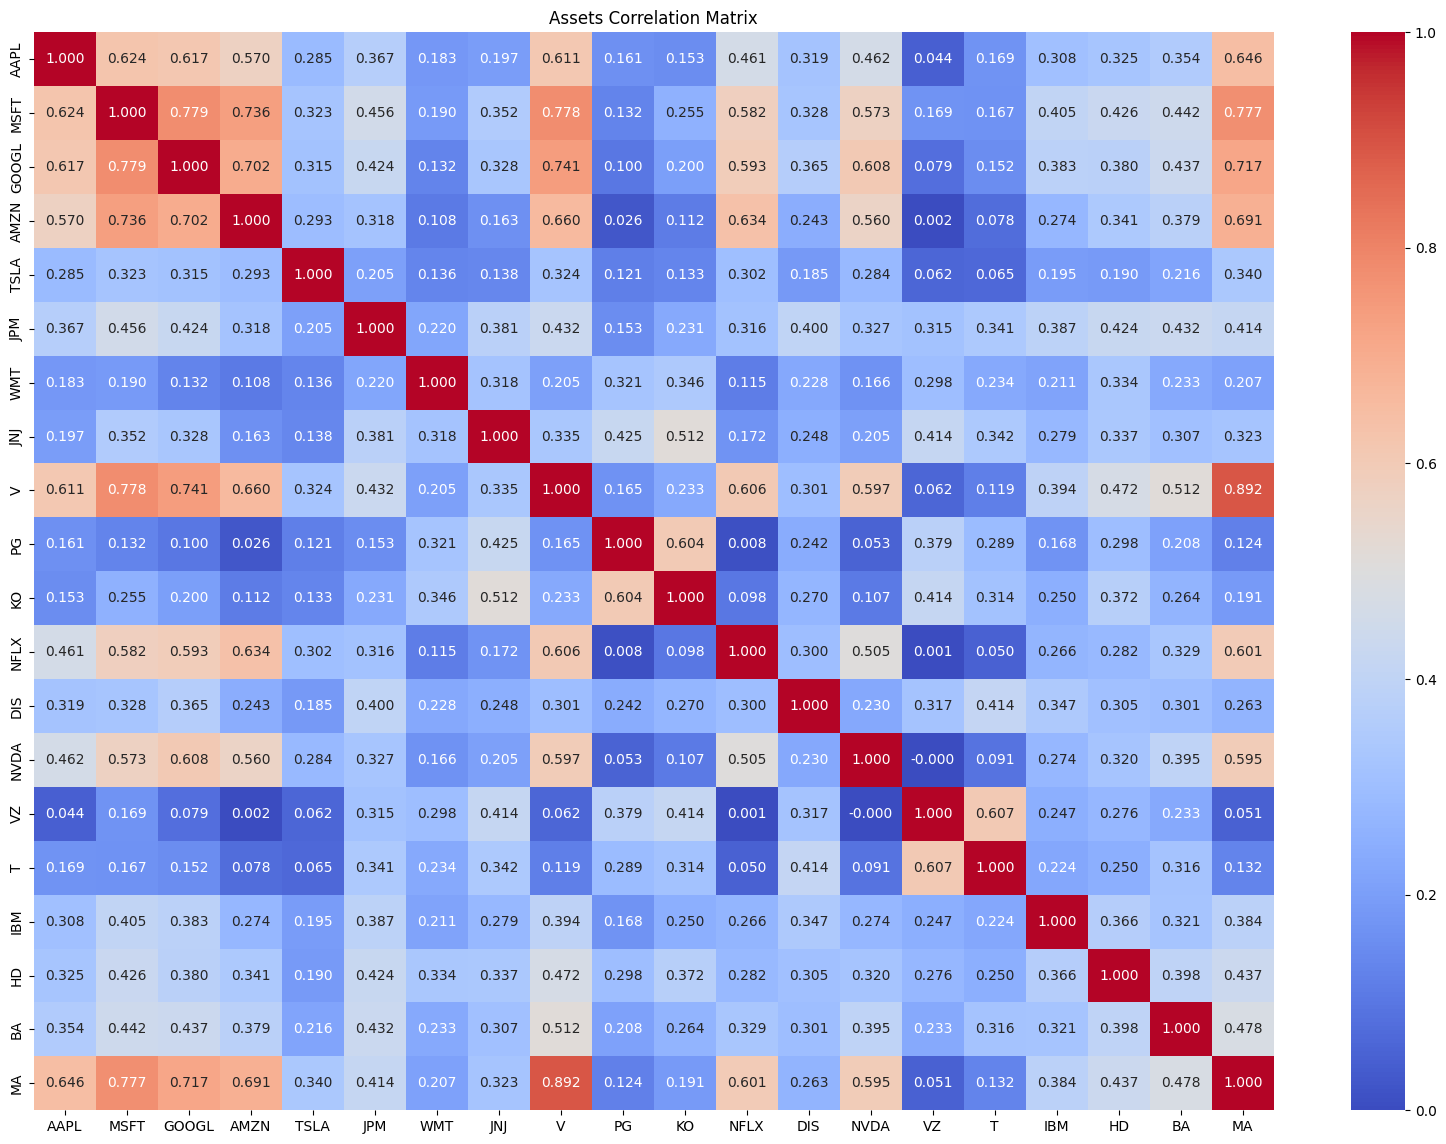

In [14]:
fig, ax = plt.subplots(figsize=(20,14))
sns.heatmap(train_close.pct_change().corr(method ='pearson'), ax=ax, cmap='coolwarm', annot=True, fmt=".3f")
ax.set_title('Assets Correlation Matrix')



In [15]:
def find_cointegrated_pairs(data):
    n = data.shape[1]
    pvalue_matrix = np.ones((n, n))
    keys = data.keys()
    pairs = []
    for i in range(n):
        for j in range(i+1, n):
            result = coint(data[keys[i]], data[keys[j]])
            pvalue_matrix[i, j] = result[1]
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
    return pvalue_matrix, pairs
pvalues, pairs = find_cointegrated_pairs(train_close)
print(pairs)

[('GOOGL', 'HD'), ('TSLA', 'JPM'), ('TSLA', 'WMT'), ('TSLA', 'JNJ'), ('TSLA', 'V'), ('TSLA', 'PG'), ('TSLA', 'KO'), ('TSLA', 'NFLX'), ('TSLA', 'DIS'), ('TSLA', 'NVDA'), ('TSLA', 'VZ'), ('TSLA', 'T'), ('TSLA', 'IBM'), ('TSLA', 'HD'), ('TSLA', 'BA'), ('TSLA', 'MA'), ('JPM', 'BA'), ('DIS', 'VZ')]


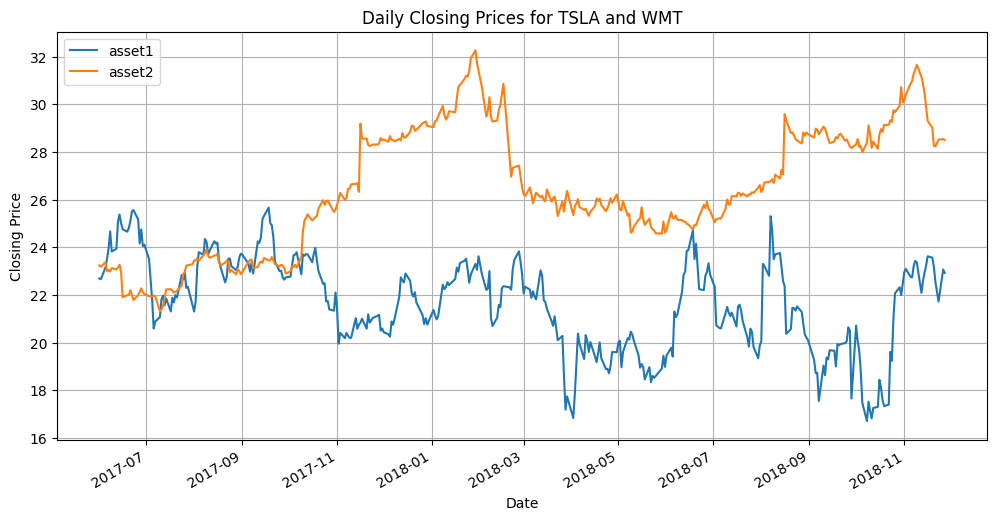

In [17]:
asset1,asset2='TSLA','WMT'
train = pd.DataFrame()
train['asset1'] = train_close[asset1]
train['asset2'] = train_close[asset2]
ax = train[['asset1','asset2']].plot(figsize=(12, 6), title = 'Daily Closing Prices for {} and {}'.format(asset1,asset2))
ax.set_ylabel("Closing Price")
ax.grid(True);